# GWT Approach

In [1]:
import json
from math import sqrt
from matplotlib import pyplot

## Data preprocessing

In [2]:
from gcd_data_manipulation import data_aggregation, load_data, series_to_supervised

In [3]:
job_id = 3418339
name = '[test]GWT_workload_%i' % job_id

In [4]:
with open('columns_selection.json') as f:
    columns_to_consider = json.load(f)['GWT_efficiency_1']

readings_df = load_data(
    '../data/task-usage_job-ID-%i_total.csv' % job_id, columns_to_consider
)
readings_df = data_aggregation(readings_df, aggr_type='mean')
readings_df

,CPU rate,canonical memory usage,assigned memory usage,unmapped page cache,total page cache,maximum memory usage,disk I/O time,local disk space usage,maximum CPU rate,maximum disk IO time,cycles per instruction,memory accesses per instruction,CPU ratio usage,memory ratio usage,disk ratio usage,Efficiency
end time,,,,,,,,,,,,,,,,
900000000,0.035042,0.087198,0.099019,0.001545,0.002126,0.088590,0.000154,0.000321,0.129656,0.022381,1.871583,0.004103,0.186891,0.886253,0.372791,0.481978
1200000000,0.033072,0.086914,0.099024,0.001394,0.001920,0.087358,0.000031,0.000321,0.095448,0.002980,1.810250,0.003875,0.176382,0.883362,0.372745,0.477496
1500000000,0.032797,0.086879,0.099033,0.001326,0.001853,0.086909,0.000026,0.000321,0.090014,0.002620,1.804167,0.003854,0.174918,0.883004,0.372754,0.476892
1800000000,0.032152,0.086869,0.099028,0.001329,0.001856,0.086904,0.000025,0.000321,0.090620,0.002374,1.818542,0.004035,0.171479,0.882903,0.372801,0.475728
2100000000,0.032904,0.087110,0.099014,0.001441,0.002013,0.088134,0.000188,0.000321,0.114349,0.024656,1.837250,0.004132,0.175490,0.885350,0.373144,0.477995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505000000000,0.037400,0.086642,0.099038,0.000760,0.001151,0.086685,NaN,0.000341,0.103828,NaN,1.795625,0.003827,0.199469,0.880594,0.395694,0.491919
2505300000000,0.036892,0.086651,0.099038,0.000701,0.001091,0.086690,NaN,0.000341,0.106115,NaN,1.783625,0.003798,0.196757,0.880691,0.395648,0.491032
2505600000000,0.035126,0.086642,0.099038,0.000699,0.001089,0.086685,NaN,0.000341,0.096773,NaN,1.762833,0.003736,0.187341,0.880594,0.395745,0.487893


In [5]:
from gcd_data_manipulation import scale_values

values = readings_df.values
scaled, scaler = scale_values(values)
scaled
# scaled.shape

array([[0.3088863 , 0.3450734 , 0.97518291, ..., 0.3450734 , 0.1114997 ,
        0.25857307],
       [0.29115833, 0.31918798, 0.97636939, ..., 0.31918798, 0.11137826,
        0.23456143],
       [0.28868951, 0.31598416, 0.97874234, ..., 0.31598416, 0.11140255,
        0.23132565],
       ...,
       [0.30964566, 0.29439477, 0.98002768, ..., 0.29439477, 0.17151184,
        0.29026236],
       [0.31482081, 0.29439477, 0.98002768, ..., 0.29439477, 0.17105039,
        0.29542557],
       [0.32413106, 0.29439477, 0.97884121, ..., 0.29439477, 0.1711354 ,
        0.3053394 ]])

In [6]:
from gcd_data_manipulation import extract_data_target, extract_final_dataframe

reframed = series_to_supervised(scaled, 1, 1)
reframed

reframed = extract_final_dataframe(
    reframed,
    [
        [
            i for i in range(
                int(reframed.shape[1] / 2), (2 * int(reframed.shape[1] / 2)) - 1
            )
        ]
    ],
)

values = reframed.values

test_x, test_y = extract_data_target(values)
test_x.shape, test_y.shape

C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


((8352, 1, 16), (8352,))

## Test

In [7]:
from tensorflow import keras
import tfRIM


model_name = '../models/rim_model_exp_01'

model = keras.models.load_model(
    model_name,
    custom_objects={
        'RIMCell': tfRIM.RIMCell,
        'GroupGRUCell': tfRIM.GroupGRUCell,
        'GroupLinearLayer': tfRIM.GroupLinearLayer,
        'GroupLSTMCell': tfRIM.GroupLSTMCell
    }
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn (RNN)                   (32, 384)                 397568    
                                                                 
 dense (Dense)               (32, 1)                   385       
                                                                 
Total params: 397,953
Trainable params: 397,953
Non-trainable params: 0
_________________________________________________________________


## Predict

In [8]:
import numpy as np

def predict_model(test_x, test_y, model):
    yhat = []
    for el in test_x:
        el = el.reshape(1, 1, test_x.shape[2])
        # https://stackoverflow.com/questions/66298721/tensorflow-python-framework-errors-impl-invalidargumenterror-specified-a-list-w
        yhat_val = model.predict(el, batch_size=1)
        yhat.append(yhat_val[0, 0])
    test_x = test_x.reshape((test_x.shape[0], test_x.shape[2]))
    yhat = np.array(yhat)
    yhat = yhat.reshape(yhat.shape[0], 1)

    inv_yhat = np.concatenate((test_x[:, :-1], yhat), axis=1)

    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:, -1]

    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test_x[:, :-1], test_y), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:, -1]

    return inv_y, inv_yhat

test_x.shape
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn (RNN)                   (32, 384)                 397568    
                                                                 
 dense (Dense)               (32, 1)                   385       
                                                                 
Total params: 397,953
Trainable params: 397,953
Non-trainable params: 0
_________________________________________________________________


In [9]:
# yhat_val = model.predict(test_x[0].reshape(1, 1, test_x.shape[2]), batch_size=1)

In [10]:
%%capture
y_1, yhat_1 = predict_model(test_x, test_y, model)

## Plot

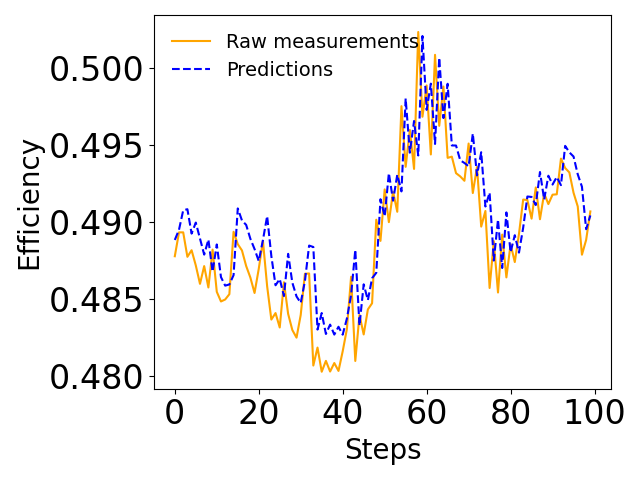

In [11]:
%matplotlib widget

pyplot.clf()
pyplot.plot(y_1[-100:], "-", color="orange", label="Raw measurements")
pyplot.plot(yhat_1[-100:], "--", color="blue", label="Predictions")
pyplot.xlabel("Steps", fontsize=20)
pyplot.ylabel("Efficiency", fontsize=20)
pyplot.xticks(fontsize=24)
pyplot.yticks(fontsize=24)
pyplot.legend(fontsize=14, frameon=False)
pyplot.tight_layout()
prediction_out_figure = "figures/gcd_%s_pred.png" % name

In [12]:
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(y_1, yhat_1))

rmse

0.004478409562839459

Simple prediction

In [13]:
def predict_model(test_x, test_y, model):
    # make a prediction
    yhat = model.predict(test_x, batch_size=72)
    testx = test_x.reshape((test_x.shape[0], test_x.shape[2]))
    # invert scaling for forecast
    inv_yhat = np.concatenate((test_x[:, :-1], yhat), axis=1)

    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:, -1]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test_x[:, :-1], test_y), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:, -1]

    return inv_y, inv_yhat

In [14]:
y_2, yhat_2 = predict_model(test_x, test_y, model)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/rnn/TensorArrayUnstack/TensorListFromTensor' defined at (most recent call last):
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 595, in run_forever
      self._run_once()
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
      handle._run()
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell
      await result
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Johann\AppData\Local\Temp\ipykernel_23024\28300653.py", line 1, in <cell line: 1>
      y_2, yhat_2 = predict_model(test_x, test_y, model)
    File "C:\Users\Johann\AppData\Local\Temp\ipykernel_23024\4163658079.py", line 3, in predict_model
      yhat = model.predict(test_x, batch_size=72)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
      return self(x, training=False)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\rnn\base_rnn.py", line 515, in __call__
      return super(RNN, self).__call__(inputs, **kwargs)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\rnn\base_rnn.py", line 652, in call
      last_output, outputs, states = backend.rnn(
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 4612, in rnn
      input_ta = tuple(
    File "C:\Users\Johann\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 4613, in <genexpr>
      ta.unstack(input_) if not go_backwards else ta
Node: 'sequential/rnn/TensorArrayUnstack/TensorListFromTensor'
Specified a list with shape [32,16] from a tensor with shape [72,16]
	 [[{{node sequential/rnn/TensorArrayUnstack/TensorListFromTensor}}]] [Op:__inference_predict_function_470047]